In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# training data set 준비
# x_data => 독립변수(공부시간)
# -1은 알아서 채우라는 소리
x_data = np.array([1,2,3,4,5], dtype=np.float64).reshape(5,-1)
print(x_data)

# t_data => 정답 데이터(시험점수)
t_data = np.array([3,5,7,9,11], dtype=np.float64).reshape(5,1)
print(t_data)

[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]]


In [3]:
# weight & bias 정의
W = np.random.rand(1,1) #1행 1열짜리(값1개) ndarray를 만들고 0과 1사이의 균등분포에서 실수 난수를 추출
b = np.random.rand(1) 

In [4]:
# loss function 
def loss_func(input_data):   # loss function은 w와 b의 함수
    input_W = input_data[0].reshape(1,1)
    input_b = input_data[1]
    
    # 예측값
    y = np.dot(x_data,input_W) +input_b
    
    # MSEㄹㄹ 구해야함
    # power( ) : 제곱함
    return np.mean(np.power(t_data - y,2))
    

In [5]:
# predict function(에측 함수, 모델, hypothesis)
def predict(x):
    y = np.dot(x,W) + b
    return y

In [6]:
# 다변수함수에 대한 수치미분 함수
def numerical_derivative(f,x):  # x = ndarray[1.0, 2.0]
                                
    delta_x = 1e-4
    derivative_x = np.zeros_like(x) # derivative_x = [0.0  0.0] 
    
    # iterator를 이용해서 입력변수 x에 대한 편미분 수행
    it = np.nditer(x,flags=['multi_index'])
    
    while not it.finished:
        idx = it.multi_index
        tmp = x[idx]              # tmp : 1.0
        
        x[idx] = tmp + delta_x    # x : ndarray[1.0001  2.0]
        fx_plus_delta = f(x)
        
        x[idx] = tmp - delta_x    # x : ndarray[0.9999  2.0]
        fx_minus_delta = f(x)
        
        derivative_x[idx] = (fx_plus_delta - fx_minus_delta) / (2 * delta_x)
        
        x[idx]  = tmp    # x : ndarray [1.0  2.0]
        it.iternext()
        
    return derivative_x

In [7]:
# 살펴보면서 이 값을 적절하게 수정해야함 초기에는 1e-4, 1e-3정도로 설정해서 사용
learning_rate = 1e-4

# 학습과정을 진행! 
for step in range(300000):
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0) #[W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W,b,loss_func(input_param)))

W : [[0.46632574]], b : [0.25727316], loss : 33.25997356997357
W : [[2.02965973]], b : [0.89291895], loss : 0.00208707649635906
W : [[2.01075622]], b : [0.96116662], loss : 0.0002744881264446389
W : [[2.00390079]], b : [0.98591691], loss : 3.6100129386972134e-05
W : [[2.00141464]], b : [0.99489271], loss : 4.747816813206243e-06
W : [[2.00051302]], b : [0.99814782], loss : 6.244233711744528e-07
W : [[2.00018605]], b : [0.9993283], loss : 8.21229128706506e-08
W : [[2.00006747]], b : [0.99975641], loss : 1.080064124611403e-08
W : [[2.00002447]], b : [0.99991166], loss : 1.4204787346732964e-09
W : [[2.00000887]], b : [0.99996796], loss : 1.8681852201357682e-10


In [8]:
# 6시간 공부하면 몇점일지를 예측
predict_date = predict(np.array([[6]]))
print('6시간 공부했을 때 점수:',predict_date)

6시간 공부했을 때 점수: [[13.00000769]]


In [11]:
#python으로 아주 간단하게 머신러닝을 해볼거임 
# sklearn(scikit-learn)
from sklearn import linear_model

# training data set 준비
x_data = np.array([1,2,3,4,5], dtype=np.float64).reshape(5,-1)
t_data = np.array([3,5,7,9,11], dtype=np.float64).reshape(5,1)

# model 생성(simple linear model) -> 완성된 모델은 아니지만 일단 모델을 생성
model = linear_model.LinearRegression()

#model 학습
model.fit(x_data,t_data)

# 학습이 끝났으닌 W와 b 출력
print('W : {}, b:{}'.format(model.coef_,model.intercept_))

# model을 이용한 예측
print(model.predict(np.array([[6]])))


W : [[2.]], b:[1.]
[[13.]]


In [12]:
# 오존량 예측하는 모델 만들기

# data 로딩
df = pd.read_csv('C:/jupyter_home/data/ozone.csv')
display(df)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [13]:
# python으로 구현 

# Ozone(오존량), Solar(태양) Wind(바람) Temp(온도)
# 이중 온도를 이용해서 오존량을 예측할거임
training_data = df[['Ozone','Temp']]
# 데이터에 결측값이 있음
training_data.info()
# 결측값을 삭제하거 대체해야함 -> 여기서는 삭제할거임
training_data.dropna(how='any', inplace=True)  # how='any' : 결측값이 있는 행을 삭제
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   116 non-null    float64
 1   Temp    153 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 0 to 152
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   116 non-null    float64
 1   Temp    116 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.7 KB


C:\Users\LG\.conda\envs\machine_TF15\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
x_data = training_data['Temp'].values.reshape(-1,1)
t_data = training_data['Ozone'].values.reshape(-1,1)

In [15]:
# W,b
W = np.random.rand(1,1)
b = np.random.rand(1)

# 학습과정을 진행! 
for step in range(300000):
    input_param = np.concatenate((W.ravel(), b.ravel()), axis=0) #[W b]
    derivative_result = learning_rate * numerical_derivative(loss_func, input_param)
    
    W = W - derivative_result[0].reshape(1,1)
    b = b - derivative_result[1]
    
    if step % 30000 == 0:
        input_param = np.concatenate((W.ravel(), b.ravel()), axis=0)
        print('W : {}, b : {}, loss : {}'.format(W,b,loss_func(input_param)))

# 예측
predict_date = predict(np.array([[62]]))
print('온도가 62일때 오존량:',predict_date)

W : [[0.52546491]], b : [0.05007433], loss : 877.1254871729982
W : [[0.72274041]], b : [-12.19716616], loss : 816.084988130599
W : [[0.8648336]], b : [-23.42479894], loss : 774.0319218318741
W : [[0.99509156]], b : [-33.71725884], loss : 738.6924840996061
W : [[1.11450007]], b : [-43.15243835], loss : 708.9948670376776
W : [[1.22396279]], b : [-51.80174214], loss : 684.0383732234288
W : [[1.32430813]], b : [-59.73062743], loss : 663.0660985053131
W : [[1.4162955]], b : [-66.99909938], loss : 645.4419758969952
W : [[1.50062105]], b : [-73.66216519], loss : 630.6314843367511
W : [[1.57792295]], b : [-79.77025038], loss : 618.1854372267685
온도가 62일때 오존량: [[16.85520349]]


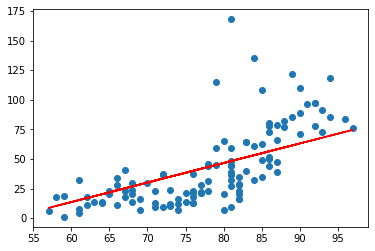

In [16]:
# 그래프로 표현
plt.scatter(x_data.ravel(),t_data.ravel())
plt.plot(x_data.ravel(), x_data.ravel()*W.ravel()+b, color='r')
plt.show()

In [17]:
# 이제 sklearn으로 구현

model = linear_model.LinearRegression()
model.fit(x_data,t_data)
print('sklearn으로 구한 온도가 62일때 오존량 :',model.predict(np.array([[62]])))

sklearn으로 구한 온도가 62일때 오존량 : [[3.58411393]]


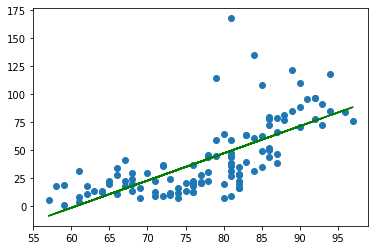

In [18]:
# 그래프로 표현
plt.scatter(x_data,t_data)
plt.plot(x_data, x_data*model.coef_+model.intercept_, color='g')
plt.show()